# The code used to create the distributions of good and bad seeds

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from src.metrics import *

#### Load data

In [2]:
datapath = "/datadrive/experiments"
metrics = ["MAPE"]
datasets = ["electricity", "traffic nips", "solar nips", "exchange rate"]

DeepAR

In [3]:
da_elec = load_data(f"{datapath}/deep_ar/electricity/5A")
da_traffic = load_data(f"{datapath}/deep_ar/traffic_nips/1A")
da_solar = load_data(f"{datapath}/deep_ar/solar_nips/1B")
da_exch = load_data(f"{datapath}/deep_ar/exchange_rate/1B")

In [4]:
da_elec_arr = calculate_timeseries_means(da_elec, metrics, 321)
da_traffic_arr = calculate_timeseries_means(da_traffic, metrics, 963)
da_solar_arr = calculate_timeseries_means(da_solar, metrics, 137)
da_exch_arr = calculate_timeseries_means(da_exch, metrics, 8)

In [5]:
da_elec_means = da_elec_arr.mean(axis=1)
da_traffic_means = da_traffic_arr.mean(axis=1)
da_solar_means = da_solar_arr.mean(axis=1)
da_exch_means = da_exch_arr.mean(axis=1)

DeepFactor

In [6]:
df_elec = load_data(f"{datapath}/deep_factor/electricity/2B")
df_traffic = load_data(f"{datapath}/deep_factor/traffic_nips/2B")
df_solar = load_data(f"{datapath}/deep_factor/solar_nips/2B")
df_exch = load_data(f"{datapath}/deep_factor/exchange_rate/1B")

In [7]:
df_elec_arr = calculate_timeseries_means(df_elec, metrics, 321)
df_traffic_arr = calculate_timeseries_means(df_traffic, metrics, 963)
df_solar_arr = calculate_timeseries_means(df_solar, metrics, 137)
df_exch_arr = calculate_timeseries_means(df_exch, metrics, 8)

In [8]:
df_elec_means = df_elec_arr.mean(axis=1)
df_traffic_means = df_traffic_arr.mean(axis=1)
df_solar_means = df_solar_arr.mean(axis=1)
df_exch_means = df_exch_arr.mean(axis=1)

DeepState

In [9]:
ds_elec = load_data(f"{datapath}/deepstate/electricity/2B")
ds_traffic = load_data(f"{datapath}/deepstate/traffic_nips/2B")
ds_solar = load_data(f"{datapath}/deepstate/solar_nips/2B")
ds_exch = load_data(f"{datapath}/deepstate/exchange_rate/2B")

In [10]:
ds_elec_arr = calculate_timeseries_means(ds_elec, metrics, 321)
ds_traffic_arr = calculate_timeseries_means(ds_traffic, metrics, 963)
ds_solar_arr = calculate_timeseries_means(ds_solar, metrics, 137)
ds_exch_arr = calculate_timeseries_means(ds_exch, metrics, 8)

In [11]:
ds_elec_means = ds_elec_arr.mean(axis=1)
ds_traffic_means = ds_traffic_arr.mean(axis=1)
ds_solar_means = ds_solar_arr.mean(axis=1)
ds_exch_means = ds_exch_arr.mean(axis=1)

N-BEATS

In [12]:
nb_elec = load_data(f"{datapath}/n_beats/electricity/1B")
nb_traffic = load_data(f"{datapath}/n_beats/traffic_nips/1B")
nb_solar = load_data(f"{datapath}/n_beats/solar_nips/1B")
nb_exch = load_data(f"{datapath}/n_beats/exchange_rate/1B")

In [13]:
nb_elec_arr = calculate_timeseries_means(nb_elec, metrics, 321)
nb_traffic_arr = calculate_timeseries_means(nb_traffic, metrics, 963)
nb_solar_arr = calculate_timeseries_means(nb_solar, metrics, 137)
nb_exch_arr = calculate_timeseries_means(nb_exch, metrics, 8)

In [14]:
nb_elec_means = nb_elec_arr.mean(axis=1)
nb_traffic_means = nb_traffic_arr.mean(axis=1)
nb_solar_means = nb_solar_arr.mean(axis=1)
nb_exch_means = nb_exch_arr.mean(axis=1)

In [15]:
da_means_array = [da_elec_means, da_traffic_means, da_solar_means, da_exch_means]
da_arrays = [da_elec_arr, da_traffic_arr, da_solar_arr, da_exch_arr]

df_means_array = [df_elec_means, df_traffic_means, df_solar_means, df_exch_means]
df_arrays = [df_elec_arr, df_traffic_arr, df_solar_arr, df_exch_arr]

ds_means_array = [ds_elec_means, ds_traffic_means, ds_solar_means, ds_exch_means]
ds_arrays = [ds_elec_arr, ds_traffic_arr, ds_solar_arr, ds_exch_arr]

nb_means_array = [nb_elec_means, nb_traffic_means, nb_solar_means, nb_exch_means]
nb_arrays = [nb_elec_arr, nb_traffic_arr, nb_solar_arr, nb_exch_arr]

LSTM

In [36]:
lstm_elec = load_data(f"{datapath}/lstm/electricity/1B")
lstm_traffic = load_data(f"{datapath}/lstm/traffic_nips/1A")
lstm_solar = load_data(f"{datapath}/lstm/solar_nips/1A")
lstm_exch = load_data(f"{datapath}/lstm/exchange_rate/1A")

In [37]:
lstm_elec_arr = calculate_timeseries_means(lstm_elec, metrics, 321)
lstm_traffic_arr = calculate_timeseries_means(lstm_traffic, metrics, 963)
lstm_solar_arr = calculate_timeseries_means(lstm_solar, metrics, 137)
lstm_exch_arr = calculate_timeseries_means(lstm_exch, metrics, 8)

In [38]:
lstm_elec_means = lstm_elec_arr.mean(axis=1)
lstm_traffic_means = lstm_traffic_arr.mean(axis=1)
lstm_solar_means = lstm_solar_arr.mean(axis=1)
lstm_exch_means = lstm_exch_arr.mean(axis=1)

In [39]:
lstm_arrays = [lstm_elec_arr, lstm_traffic_arr, lstm_solar_arr, lstm_exch_arr]
lstm_mean_arrays = [lstm_elec_means, lstm_traffic_means, lstm_solar_means, lstm_exch_means]

TensorFlow LSTM

In [40]:
def load_forecasts(experiment_path):
    repetitions = []
    for folder in sorted(os.listdir(experiment_path)):
        repetitions.append(pd.read_csv(f"{experiment_path}/{folder}/forecasts.csv", index_col=0).rename_axis("index"))
    return repetitions

In [41]:
def calculate_mape(repetitions, num_timeseries, num_windows=7, horizon=24):
    exp = []
    for rep in repetitions:
        array = rep[["target", "sample0"]].values
        array = array.reshape((num_timeseries * num_windows, horizon, 2))
        
        # Calculate MAPE like in GluonTS evaluator
        denominator = np.abs(array[:, :, 0])
        flag = denominator == 0
        mape = np.mean(np.abs((array[:, :, 0] - array[:, :, 1]) * (1 - flag)) / (denominator + flag), axis=1).reshape((-1, num_timeseries))

        metrics_df = pd.DataFrame(
            data=mape.reshape([-1, 1]),
            columns=["MAPE"]
            ).rename_axis("index")
        metrics_df["item_id"] = metrics_df.index % 321
        exp.append(metrics_df)
        
    return exp




In [42]:
tflstm_elec = load_forecasts(f"{datapath}/tf_lstm/electricity/1B")
tflstm_elec = calculate_mape(tflstm_elec, 321)

tflstm_traffic = load_forecasts(f"{datapath}/tf_lstm/traffic_nips/1A")
tflstm_traffic = calculate_mape(tflstm_traffic, 963)

tflstm_solar = load_forecasts(f"{datapath}/tf_lstm/solar_nips/1A")
tflstm_solar = calculate_mape(tflstm_solar, 137)

tflstm_exch = load_forecasts(f"{datapath}/tf_lstm/exchange_rate/1B")
tflstm_exch = calculate_mape(tflstm_exch, 8, 5, 30)

In [43]:
tflstm_elec[0].shape

(2247, 2)

In [44]:
tflstm_elec_arr = calculate_timeseries_means(tflstm_elec, metrics, 321)
tflstm_traffic_arr = calculate_timeseries_means(tflstm_traffic, metrics, 963)
tflstm_solar_arr = calculate_timeseries_means(tflstm_solar, metrics, 137)
tflstm_exch_arr = calculate_timeseries_means(tflstm_exch, metrics, 8)

In [45]:
tflstm_elec_arr.shape

(100, 321, 1)

In [46]:
tflstm_elec_means = tflstm_elec_arr.mean(axis=1)
tflstm_traffic_means = tflstm_traffic_arr.mean(axis=1)
tflstm_solar_means = tflstm_solar_arr.mean(axis=1)
tflstm_exch_means = tflstm_exch_arr.mean(axis=1)

In [47]:
tflstm_arrays = [tflstm_elec_arr, tflstm_traffic_arr, tflstm_solar_arr, tflstm_exch_arr]
tflstm_mean_arrays = [tflstm_elec_means, tflstm_traffic_means, tflstm_solar_means, tflstm_exch_means]

#### Sort seeds by MAPE score, then plot the histogram of best and worst seeds in the same figure

In [19]:
num_bins = 100
n = 10
num_series = [321, 963, 137, 8]

In [50]:
def plot_smoothed_histogram(data_array, mean_array, labels, smoothing_factor=1, plot_mape=False):
    
    def moving_average(array, n):
        ret = np.cumsum(array)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n

    plot_num = 1
    for i in range(1, len(data_array) + 1):
        for j in range(1, len(datasets) + 1):
            plt.subplot(len(data_array), len(datasets), plot_num)
            plot_num += 1

            best_indexes, best_counts = np.unique(np.argsort(data_array[i - 1][j - 1], axis=0)[:n], return_counts=True)
            worst_indexes, worst_counts = np.unique(np.argsort(data_array[i - 1][j - 1], axis=0)[-n:], return_counts=True)

            # Normalize the counts
            best_counts = best_counts / num_series[j - 1]
            worst_counts = worst_counts / num_series[j - 1]

            # Create histogram
            best_bin_counts = count_repetitions_among_top_n(best_indexes, best_counts, num_bins)
            worst_bin_counts = count_repetitions_among_top_n(worst_indexes, worst_counts, num_bins)
            bin_counts = best_bin_counts - worst_bin_counts

            # Sort by MAPE score
            sorting_idx = np.argsort(mean_array[i - 1][j - 1].flatten())
            sorted_bin_counts = bin_counts[sorting_idx]
            sorted_best_bin_counts = best_bin_counts[sorting_idx]
            sorted_worst_bin_counts = -worst_bin_counts[sorting_idx]

            # Smooth the values
            smoothed_best = moving_average(sorted_best_bin_counts, smoothing_factor)
            smoothed_worst = moving_average(sorted_worst_bin_counts, smoothing_factor)

            # Fill area between 0 and the smoothed values
            plt.fill_between(np.arange(smoothed_best.shape[0]), smoothed_best)
            plt.fill_between(np.arange(smoothed_worst.shape[0]), smoothed_worst)

            if plot_mape:
                plt.plot(mean_array[i - 1][j - 1][sorting_idx] - mean_array[i - 1][j - 1].mean(), color="C2")
                #plt.plot((mean_array[i - 1][j - 1][sorting_idx] - mean_array[i - 1][j - 1].mean()) / mean_array[i - 1][j - 1].std(), color="C2")
            
            plt.ylim([-1, 1])
            plt.yticks([])
            plt.xticks([])
            if i == 1:
                plt.title(datasets[j - 1])
            if j == 1:
                plt.ylabel(labels[i - 1], labelpad=30, rotation="horizontal", y=0.4)

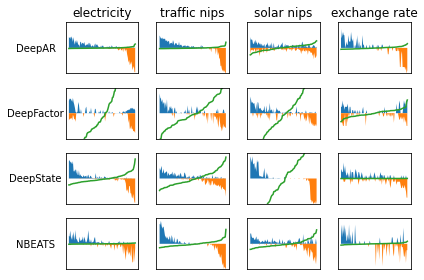

In [51]:
labels = ["DeepAR", "DeepFactor", "DeepState", "NBEATS"]
plot_smoothed_histogram([da_arrays, df_arrays, ds_arrays, nb_arrays], [da_means_array, df_means_array, ds_means_array, nb_means_array], labels, plot_mape=True)
plt.tight_layout()
plt.savefig("seed_distributions.png", dpi=400)

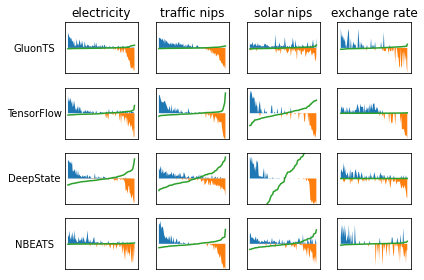

In [52]:
# We plot two other models as well to get the same aspect ratio for the subplots. We can crop it manually later.
labels = ["GluonTS", "TensorFlow", "DeepState", "NBEATS"]
plot_smoothed_histogram([lstm_arrays, tflstm_arrays, ds_arrays, nb_arrays], [lstm_mean_arrays, tflstm_mean_arrays, ds_means_array, nb_means_array], labels, plot_mape=True)
plt.tight_layout()
plt.savefig("seed_distributions_lstm.png", dpi=400)